In [1]:
import sys
sys.path.append('..')

import torch
import clip
from src.utils.get_model_and_data import get_model_and_data

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
device = "cuda" if torch.cuda.is_available else "cpu"
parameters = {'device': device}
model, datasets = get_model_and_data(parameters)

checkpoint_path = "../checkpoint/boxclip-finetune-coslr/checkpoint-epoch100.pth.tar"
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model'])

loading annotations into memory...
Done (t=16.93s)
creating index...
index created!
loading annotations into memory...
Done (t=1.05s)
creating index...
index created!
train set scale: 21391
loading annotations into memory...
Done (t=0.53s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
val set scale: 925


<All keys matched successfully>

In [3]:
target = [{'bbox': [1,2,3,4]}, {'bbox': [1,2,3,4]}]
# _target = target.copy()
_target = [obj.copy() for obj in target]
_target[0]['bbox'] = [0, 0, 0, 0]

# for obj in target:
#     obj['bbox'] = [0, 0, 0, 0]
print(f"target: {target}")
print(f"_target: {_target}")

target: [{'bbox': [1, 2, 3, 4]}, {'bbox': [1, 2, 3, 4]}]
_target: [{'bbox': [0, 0, 0, 0]}, {'bbox': [1, 2, 3, 4]}]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['A man in a wet suit stands on a surfboard and rows with a paddle.', 'A paddle boarder on a large, still body of water.', 'A man is holding a long racquet on a surfboard in the middle of the sea.', 'Black and white of a person wearing a wetsuit standing on a surfboard and holding out a paddle, in a large body of water outside.', 'A man with a wet suit on standing on a surfboard in the water.']
[0.701359375, 0.3757460317460317, 0.07953125, 0.3899365079365079]
[0.5612812500000001, 0.7310793650793651, 0.342015625, 0.04771428571428571]


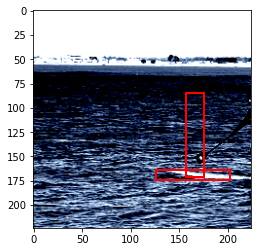

In [8]:
plt.figure()
data = datasets['val'][3]
plt.imshow(data[0].permute(1,2,0)) # (img, bbox, caption)
print(data[2])
for obj in data[1]:
    bbox_x, bbox_y, bbox_w, bbox_h = obj['bbox']
    plt.gca().add_patch(plt.Rectangle((bbox_x*224, bbox_y*224), bbox_w*224, bbox_h*224, 
                                      fill=False, edgecolor='r', linewidth=2))
    print(obj['bbox'])

In [6]:
text = 'a man is holding a ball.'

text = clip.tokenize(text).to(device)
text_feature = model.clip_model.encode_text(text).float().unsqueeze(0)
print(f'Text feature shape: {text_feature.shape}')

generate = model.generate(text_feature) # {'z', 'masks', 'output_bbox': (bs, num_boxes, 4), 'output_cat_feats'}

plt.figure()
output_bbox = generate['output_bbox'][0]

with torch.no_grad():
    for i in range(output_bbox.shape[0]):
        [bbox_x, bbox_y, bbox_w, bbox_h] = output_bbox[i].cpu() * 224
        plt.gca().add_patch(plt.Rectangle((bbox_x, bbox_y), bbox_w, bbox_h, 
                                        fill=False, edgecolor='r', linewidth=2))

print(bbox_x, bbox_y, bbox_w, bbox_h)
plt.ylim(0, 224)
plt.xlim(0, 224)

Text feature shape: torch.Size([1, 1, 512])


AssertionError: For batched (3-D) `query`, expected `key` and `value` to be 3-D but found 4-D and 4-D tensors respectively